In [1]:
import torch
import wandb
from hydra import compose, initialize

from src.eval.visualize import visualize_dvinp_both
from src.utils.load_dvinp import load_dvinp

In [2]:
try:
    import torch_directml
    device = torch_directml.device() 
except ImportError:
    device = torch.device("cpu") 

In [3]:
dir = "../models/dis"
# dir =  "../models/feasible-energy-13" 
# dir =  "../models/logical-silence-28" 
# dir =  "../models/divine-paper-53" 
# dir = "../models/soft-dust-62"
# dir = "../models/sparkling-bee-2"
# dir = "../models/stilted-spaceship-54"

In [4]:
with initialize(version_base=None, config_path=dir):
    cfg = compose(config_name="cfg")

    dvinp, trainer, test_loader = load_dvinp(
        cfg=cfg, 
        device=device, 
        dir=dir, 
        load_decoder_only=False, 
        train_decoder=True
    ) 


Generating tasks: 100%|██████████| 4096/4096 [00:00<00:00, 278410.38it/s]
Dropped Escape call with ulEscapeCode : 0x03007703


In [5]:
trainer.wandb_logging = False
if trainer.wandb_logging:
    wandb.init(project="test") # "pretrained-decoder")

In [6]:
train = True

if train:
    # trainer.optimizer.param_groups[0]["lr"] = 0.1 * cfg.training.learning_rate
    # print(trainer.optimizer.param_groups[0]["lr"])

    num_epochs = 50
    losses = trainer.train(
        num_epochs=num_epochs,
        max_clip_norm=cfg.training.max_clip_norm,
        alpha=cfg.training.alpha,
        validate=True
    )

    # torch.save(dvinp.state_dict(), f"{dir}/dvinp.pth")

  0%|          | 0/1 [00:00<?, ?it/s]/home/chickencurry/miniconda3/envs/directml/lib/python3.11/site-packages/torch/distributions/normal.py:71: UserWarning: The operator 'aten::normal.Tensor_Tensor' is not currently supported on the DML backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /__w/1/s/pytorch-directml-plugin/torch_directml/csrc/dml/dml_cpu_fallback.cpp:15.)
  return torch.normal(self.loc.expand(shape), self.scale.expand(shape))
/home/chickencurry/dvi-for-bml/src/eval/grid.py:83: RuntimeWarning: invalid value encountered in divide
  vals = vals / (np.sum(vals, axis=-1, keepdims=True))
 31%|███▏      | 10/32 [00:10<00:23,  1.08s/it, epoch=2, loss=271, lmpl=-157, mse=442]


KeyboardInterrupt: 

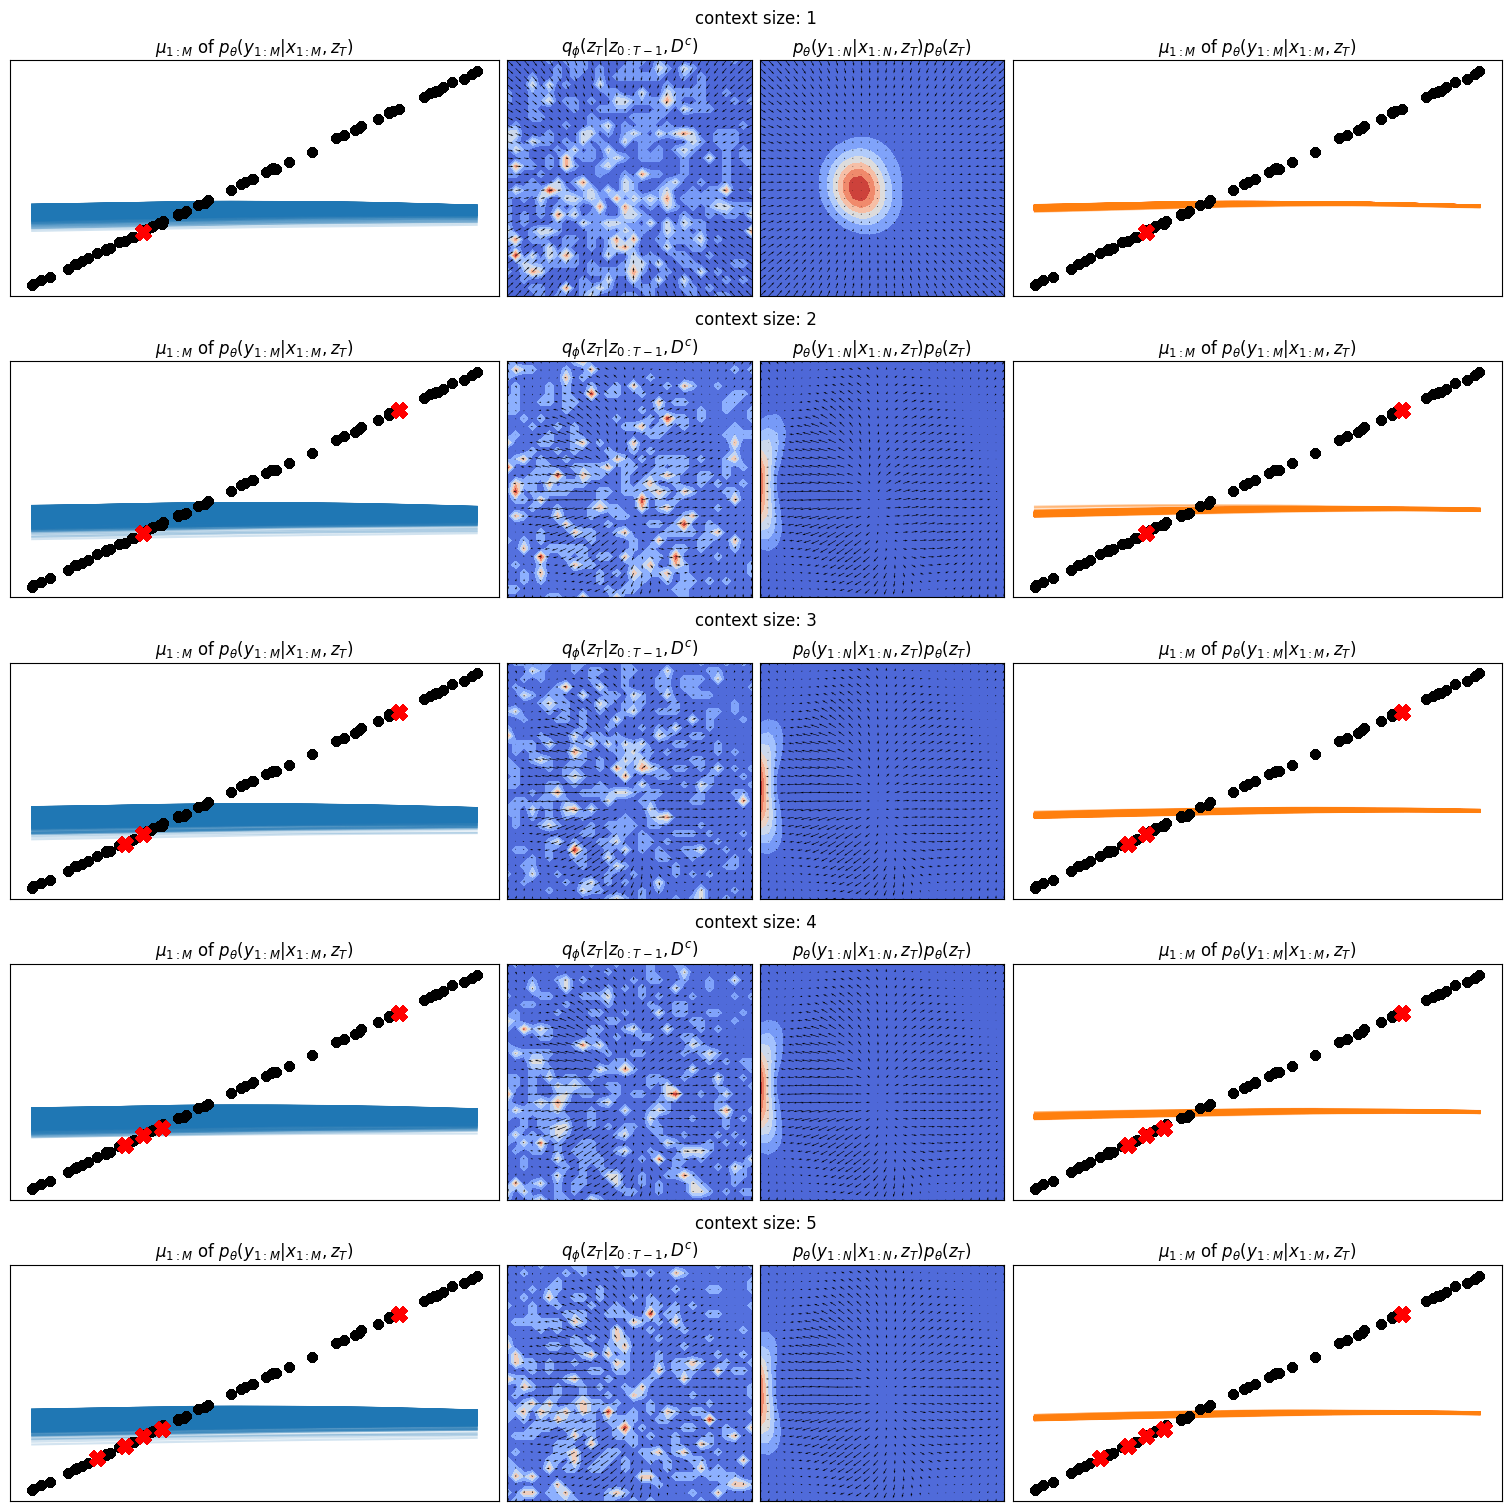

In [7]:
max_context_size = 5
num_samples = 900 # num_cells will be root

ranges = [(-5, 5), (-5, 5)]

targets, samples = visualize_dvinp_both(
    device=device,
    dvinp=dvinp,
    dataloader=test_loader,
    num_samples=num_samples,
    max_context_size=max_context_size,
    ranges=ranges,
)